In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
ds = pd.read_csv('/home/pranav/Datasets/Titanic/train.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:

cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = ds.drop(cols_to_drop, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [26]:
def convert_sex_to_num(s):
    if s == 'male':
        return 0
    elif s == 'female':
        return 1
    else:
        return s

df.Sex = df.Sex.map(convert_sex_to_num)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [30]:
data = df.dropna()
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


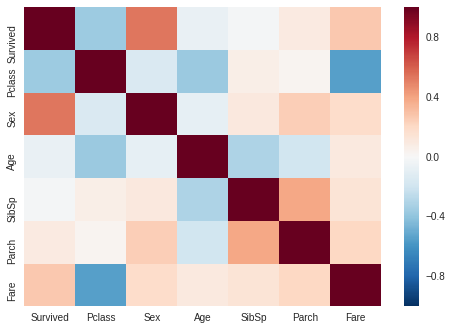

In [28]:
sns.heatmap(data.corr())

In [36]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare']
out_cols = ['Survived']

X = data[input_cols]
y = data[out_cols]

print X.shape, y.shape


(714, 6) (714, 1)


In [37]:
data = data.reset_index(drop = True)

# Functions for Decision Tree

In [38]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], x_data.columns)
    x_left = pd.DataFrame([], x_data.columns) 
    
    for ix in xrange(x_data.shape[0]):
        # Retrieve the current value for the fkey column
        try:
            val = x_data[fkey].loc[ix]
        except:
            print x_data[fkey]
            val = x_data[fkey].loc[ix]
        
        #Check where the row needs to go
        if val > fval:#pass the row to the right
            x_right = x_right.append(x_data.loc[ix])
            
        else:#pass the row to the left
            x_left = x_left.append(x_data.loc[ix])
    
    #Return the divided datasets
    return x_left, x_right 

Entropy & Information Gain
Generally, information entropy is the average information of all possible outcomes.

In [41]:
def entropy(col):
    p = []
    p.append(col.mean())
    p.append(1 - p[0])
    
    ent = 0.0
    for px in p:
        ent += (-1.0 * px * np.log2(px))
    return ent

def info_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return 2*entropy(xdata.Survived) - (entropy(left.Survived) + entropy(right.Survived))

In [42]:
for fx in X.columns:
    print fx,
    print info_gain(data, fx, data[fx].mean())

Pclass 0.169387944636
Sex 0.412885826748
Age 7.90361215985e-06
SibSp -0.000906296584044
Parch 0.0130749190565
Fare 0.0955393677915


In [49]:

class DecisionTree:
    def __init__(self, depth = 0, max_depth = 5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self, X_train):
        print self.depth, '-'*10
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gains = []
        
        for fx in features:
            gains.append(info_gain(X_train, fx, X_train[fx].mean()))
            
        #store the best feature (using minimum information gain)
        self.fkey = features[np.argmin(gains)]
        self.fval = X_train[self.fkey].mean()
        
        #divide the dataset
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
        
        #Check the shapes
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
                
        #branch to right
        self.right = DecisionTree(depth=self.depth+1, max_depth = self.max_depth)
        self.right.train(data_right)
        
        #branch to left
        self.left = DecisionTree(depth=self.depth+1, max_depth = self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
            
        else:
            self.target = 'Dead'
        return
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            #go right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            #go left
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [50]:
split = int(0.8 * data.shape[0])

training_data = data[:split]
testing_data = data[split:]


In [51]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


5 ----------


AttributeError: 'DataFrame' object has no attribute 'Survived'